THE SPARKS FOUNDATION GRIP TASKS

DATA SCIENCE AND BUSINESS ANALYTICS TASKS

NAME : VIKASH KUMAR

TASK 1 : PREDICTION USING SUPERVISED MACHINE LEARNING (SIMPLE LINEAR REGRESSION)

AIM : To predict the percentage of a student based on the no. of hours of study and to predict the score if the student studies for 9.25 hrs/day.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

LOADING DATASET

In [2]:
# Reading data from web
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape #checking the shape of dataset

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since there are no missing values in the dataset, Data Cleaning is not required.

DATA VISUALIZATION

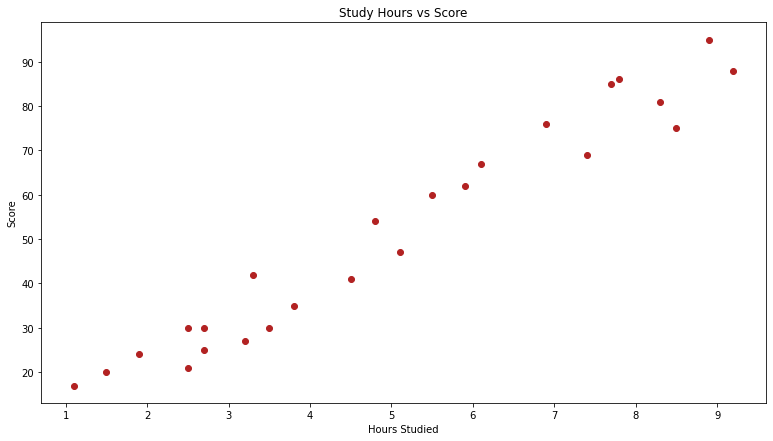

In [7]:
# Plotting the graph between hours studied and Scores obtained
x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)
plt.figure(figsize=(13,7))
plt.scatter(x, y, color="firebrick",marker="o")  
plt.title('Study Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')
plt.show()

From the scatter plot it is clear that as the number of hours of study increases, the student's score also increases.

Thus, there is a positive linear relationship between hours studied and score obtained.

Therefore, we build a Simple Linear Regression Model for the given dataset.

SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) 

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

TRAINING THE MODEL

In [10]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

In [11]:
model.intercept_

array([1.50791048])

In [12]:
model.coef_

array([[9.94061514]])

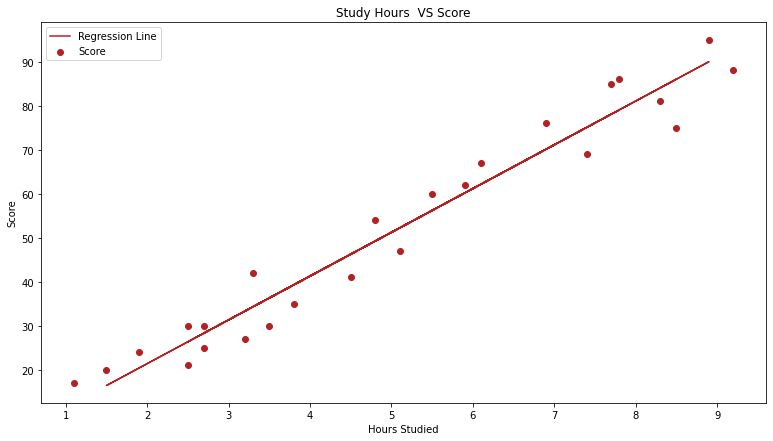

In [13]:
# Plotting the regression line
line = model.coef_*x_train+model.intercept_

# Plotting for the given dataset
plt.figure(figsize=(13,7))
plt.scatter(x, y,label="Score",color="firebrick",marker="o")
plt.plot(x_train, line,label="Regression Line",color="firebrick")
plt.title("Study Hours  VS Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.legend()
plt.show()

PREDICTION USING THE MODEL

In [14]:
y_pred = model.predict(x_test).round(2) # Predicting the scores for testing dataset
y_pred

array([[12.44],
       [26.36],
       [20.4 ],
       [92.96],
       [70.1 ]])

In [15]:
# Comparing Actual vs Predicted scores for test dataset
df = pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Hours","Actual Score","Predicted Score"])  
df 

,Hours,Actual Score,Predicted Score
0,1.1,17.0,12.44
1,2.5,21.0,26.36
2,1.9,24.0,20.40
3,9.2,88.0,92.96
4,6.9,76.0,70.10


PREDICTING THE SCORE WHEN THE STUDENT STUDIES FOR 9.25 HOURS/DAY.

In [16]:
hours = 9.25
pred = model.predict([[hours]])[0][0].round(2)
print("No of Hours studied= ",hours)
print("Predicted Score = ",pred)

No of Hours studied=  9.25
Predicted Score =  93.46


EVALUATING THE MODEL

In [17]:
#Checking the error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.876


In [18]:
#Checking the Accuracy
print("Model-Score :",model.score(x_test,y_test))

Model-Score : 0.9735538080811826


This shows that our model gives 97.355% accurate results, which is good.

INTERPRETATION : If the student studies for 9.25 hrs/day, then according to our model he/she can get a score of 93.46%

THANK YOU